In [ ]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

CARTOPY_DIR not set. Using default Cartopy data directory.
src path /Volumes/s/tcpips/adforce


In [ ]:
from w22.ps_runs import get_processed_data_for_point

In [2]:
ds = get_processed_data_for_point("hong_kong", member="r4i1p1f1", model="CESM2", exp="ssp585")

'convert'  0.00415 s 



In [22]:
ds

<xarray.Dataset> Size: 22kB
Dimensions:  (time: 86, nbnd: 2, p: 19)
Coordinates:
  * time     (time) object 688B 2015-08-15 12:00:00 ... 2100-08-15 12:00:00
    lon      float64 8B 115.2
    lat      float64 8B 21.25
  * nbnd     (nbnd) float64 16B 0.0 1.0
  * p        (p) float64 152B 1e+03 925.0 850.0 700.0 ... 20.0 10.0 5.0 1.0
Data variables:
    sst      (time) float32 344B 31.33 30.82 31.05 31.28 ... 34.57 33.61 34.59
    rh       (time) float32 344B 85.55 85.49 86.62 83.87 ... 87.67 88.77 85.34
    q        (time, p) float32 7kB nan 18.26 13.79 ... 0.00375 0.00402 0.004362
    msl      (time) float32 344B 1.003e+03 1.001e+03 ... 1.003e+03 1.009e+03
    t        (time, p) float64 13kB 25.38 24.82 20.96 ... -53.25 -41.65 -26.61
Attributes: (12/63)
    CDI:                              Climate Data Interface version 2.5.2 (h...
    Conventions:                      CF-1.7 CMIP-6.2
    source:                           CESM2 (2017): atmosphere: CAM6 (0.9x1.2...
    institution:                      National Center for Atmospheric Researc...
    activity_id:                      ScenarioMIP
    branch_method:                    standard
    ...                               ...
    intake_esm_dataset_key:           ScenarioMIP.NCAR.CESM2.ssp585.Omon.gn
    history:                          Tue Jul 22 14:21:27 2025: cdo -f nc4 -s...
    NCO:                              netCDF Operators version 5.3.4 (Homepag...
    CDO:                              Climate Data Operators version 2.5.2 (h...
    pi_calculated_at_git_hash:        083507c176faa97b83626b0b8ff42dd8bc7fb21f
    pi_calculated_at_time:            2025-09-13 22:53:00

In [3]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [4]:
ds

<xarray.Dataset> Size: 15kB
Dimensions:  (time: 86, nbnd: 2, p: 19)
Coordinates:
  * time     (time) object 688B 2015-08-15 12:00:00 ... 2100-08-15 12:00:00
    lon      float64 8B 115.2
    lat      float64 8B 21.25
  * nbnd     (nbnd) float64 16B 0.0 1.0
  * p        (p) float64 152B 1e+03 925.0 850.0 700.0 ... 20.0 10.0 5.0 1.0
Data variables:
    sst      (time) float32 344B 31.33 30.82 31.05 31.28 ... 34.57 33.61 34.59
    rh       (time) float32 344B 85.55 85.49 86.62 83.87 ... 87.67 88.77 85.34
    q        (time, p) float32 7kB nan 18.26 13.79 ... 0.00375 0.00402 0.004362
    msl      (time) float32 344B 1.003e+03 1.001e+03 ... 1.003e+03 1.009e+03
    t        (time, p) float32 7kB nan 24.82 20.96 ... -53.25 -41.65 -26.61
Attributes: (12/61)
    CDI:                              Climate Data Interface version 2.5.2 (h...
    Conventions:                      CF-1.7 CMIP-6.2
    source:                           CESM2 (2017): atmosphere: CAM6 (0.9x1.2...
    institution:                      National Center for Atmospheric Researc...
    activity_id:                      ScenarioMIP
    branch_method:                    standard
    ...                               ...
    intake_esm_attrs:version:         20200528
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           ScenarioMIP.NCAR.CESM2.ssp585.Omon.gn
    history:                          Tue Jul 22 14:21:27 2025: cdo -f nc4 -s...
    NCO:                              netCDF Operators version 5.3.4 (Homepag...
    CDO:                              Climate Data Operators version 2.5.2 (h...

In [5]:
from matplotlib import pyplot as plt
from sithom.plot import plot_defaults, label_subplots

In [6]:
plot_defaults()

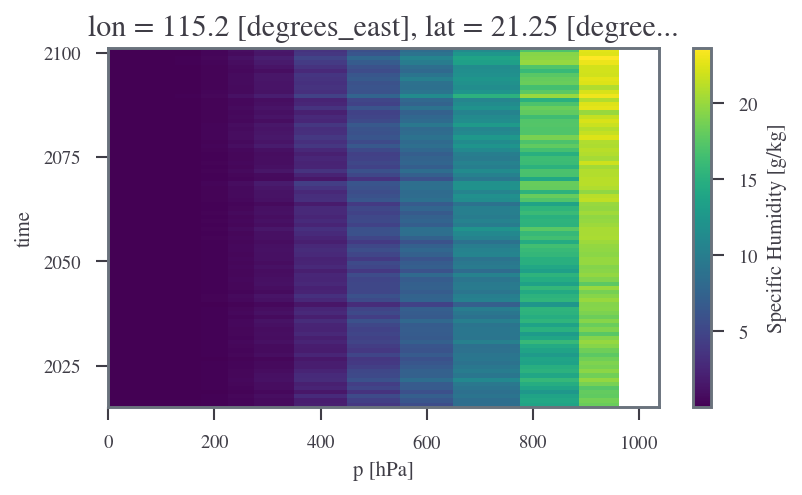

In [7]:
ds.q.plot()

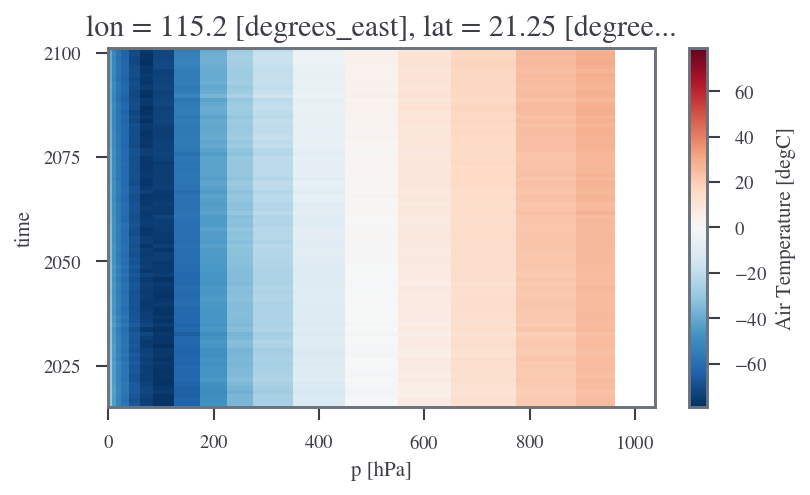

In [8]:
ds.t.plot()

In [9]:
from tcpips.pi import fix_temp_profile

In [25]:
fix_ds = fix_temp_profile(ds)

In [24]:
ds.p

<xarray.DataArray 'p' (p: 19)> Size: 152B
array([1000.,  925.,  850.,  700.,  600.,  500.,  400.,  300.,  250.,  200.,
        150.,  100.,   70.,   50.,   30.,   20.,   10.,    5.,    1.])
Coordinates:
    lon      float64 8B 115.2
    lat      float64 8B 21.25
  * p        (p) float64 152B 1e+03 925.0 850.0 700.0 ... 20.0 10.0 5.0 1.0

In [26]:
fix_ds_int = fix_temp_profile(ds, method="interpolate")

In [81]:
def fix_calc_and_plot(axs, ds, method, color):
    if method == "cut":
        fix_ds = ds.isel(p=slice(1, None))
    elif method == "double_cut":
        fix_ds = ds.isel(p=slice(2, None))
    elif method == "triple_cut":
        fix_ds = ds.isel(p=slice(3, None))
    else:
        fix_ds = fix_temp_profile(ds, method=method)
    # ax = fix_ds.t.plot.line(y="p", label=None, add_legend=False)
    pi_ds = calculate_pi(fix_ds)

    pi_ds.vmax.plot(ax=axs[0], color=color, alpha=0.5)
    axs[0].set_title("")
    axs[0].set_xlabel("")
    ds.sst.plot(ax=axs[1], color=color, alpha=0.5)
    axs[1].set_title("")
    axs[1].set_xlabel("")
    pi_ds.t0.plot(ax=axs[2], color=color, alpha=0.5)
    axs[2].set_title("")
    axs[2].set_xlabel("")
    pi_ds.otl.plot(ax=axs[3], color=color, alpha=0.5, label=method)
    axs[3].set_title("")
    axs[3].set_xlabel("")
    axs[3].set_xlim(pi_ds.time.min().values, pi_ds.time.max().values)

    # ax.invert_yaxis()
    return fix_ds

In [72]:
ds.to_netcdf("hong_kong_ssp585_r4i1p1f1.nc")

In [ ]:
def try_all_methods(ds):
    fig, axs = plt.subplots(4, 1, figsize=(5, 7), sharex=True)#, figsize=(10, 5))
    fix_calc_and_plot(axs, ds, method="interpolate", color="green")
    fix_calc_and_plot(axs, ds, method="lapse_rate", color="orange")
    fix_calc_and_plot(axs, ds, method="cut", color="red")
    fix_calc_and_plot(axs, ds, method="double_cut", color="blue")
    fix_calc_and_plot(axs, ds, method="triple_cut", color="purple")
    plt.legend()
    label_subplots(axs, override="outside")

Calculated potential intensity: <xarray.Dataset> Size: 4kB
Dimensions:  (time: 86)
Coordinates:
  * time     (time) object 688B 2015-08-15 12:00:00 ... 2100-08-15 12:00:00
    lon      float64 8B 115.2
    lat      float64 8B 21.25
Data variables:
    vmax     (time) float64 688B 126.1 120.1 124.0 129.4 ... 132.7 119.4 137.2
    pmin     (time) float64 688B 875.4 884.7 881.8 872.9 ... 863.9 888.8 860.2
    ifl      (time) int64 688B 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    t0       (time) float64 688B 198.3 197.6 198.3 199.3 ... 195.8 195.8 197.5
    otl      (time) float64 688B 77.47 80.09 79.96 79.32 ... 70.0 70.0 70.0 70.0
Attributes:
    V_reduc:  1.0
    CKCD:     0.9
    ptop:     50.0
'calculate_pi'  0.10848 s 

Calculated potential intensity: <xarray.Dataset> Size: 4kB
Dimensions:  (time: 86)
Coordinates:
  * time     (time) object 688B 2015-08-15 12:00:00 ... 2100-08-15 12:00:00
    lon      float64 8B 115.2
    lat      float64 8B 21.25
Data variables:
    vmax  

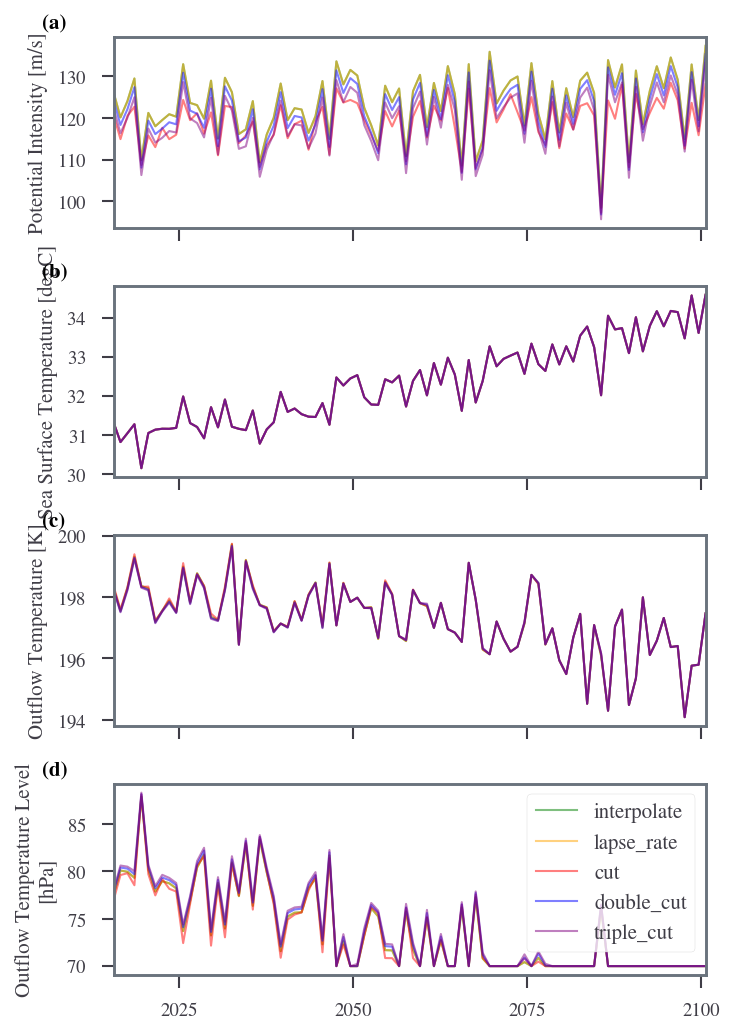

In [84]:
try_all_methods(ds)

In [68]:
pi_ds

<xarray.Dataset> Size: 4kB
Dimensions:  (time: 86)
Coordinates:
  * time     (time) object 688B 2015-08-15 12:00:00 ... 2100-08-15 12:00:00
    lon      float64 8B 115.2
    lat      float64 8B 21.25
Data variables:
    vmax     (time) float64 688B 126.1 120.1 124.0 129.4 ... 132.7 119.4 137.2
    pmin     (time) float64 688B 875.4 884.7 881.8 872.9 ... 863.9 888.8 860.2
    ifl      (time) int64 688B 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    t0       (time) float64 688B 198.3 197.6 198.3 199.3 ... 195.8 195.8 197.5
    otl      (time) float64 688B 77.47 80.09 79.96 79.32 ... 70.0 70.0 70.0 70.0
Attributes:
    V_reduc:  1.0
    CKCD:     0.9
    ptop:     50.0

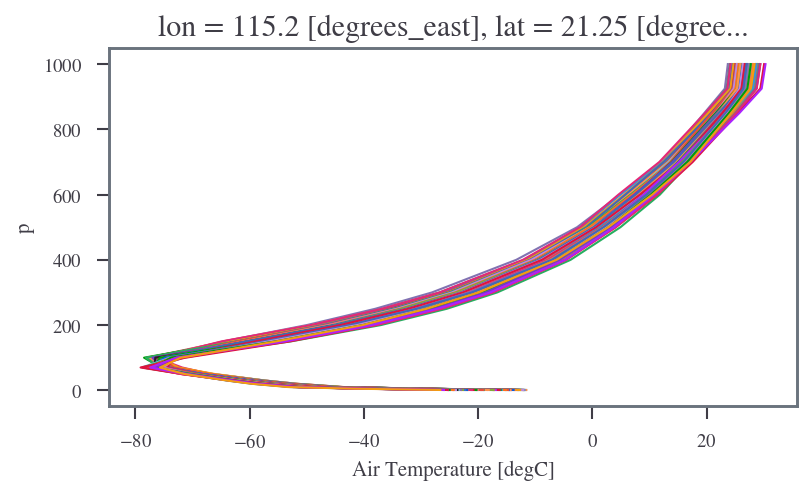

In [29]:
_ = fix_ds_int.t.plot.line(y="p", label=None, add_legend=False)

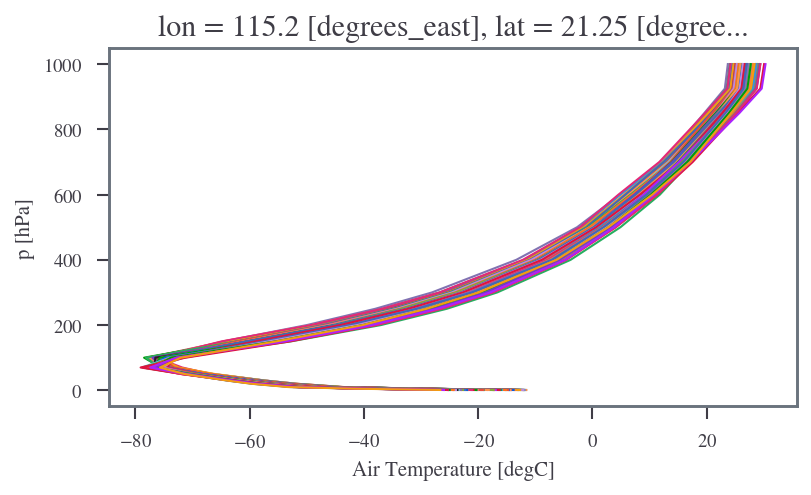

In [11]:
_ = fix_ds.t.plot.line(y="p", label=None, add_legend=False)

In [12]:
from tcpips.pi import calculate_pi

In [13]:
pi_ds = calculate_pi(fix_ds)

Calculated potential intensity: <xarray.Dataset> Size: 4kB
Dimensions:  (time: 86)
Coordinates:
  * time     (time) object 688B 2015-08-15 12:00:00 ... 2100-08-15 12:00:00
    lon      float64 8B 115.2
    lat      float64 8B 21.25
Data variables:
    vmax     (time) float64 688B 126.1 120.1 124.0 129.4 ... 132.7 119.4 137.2
    pmin     (time) float64 688B 875.4 884.7 881.8 872.9 ... 863.9 888.8 860.2
    ifl      (time) int64 688B 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    t0       (time) float64 688B 198.3 197.6 198.3 199.3 ... 195.8 195.8 197.5
    otl      (time) float64 688B 77.47 80.09 79.96 79.32 ... 70.0 70.0 70.0 70.0
Attributes:
    V_reduc:  1.0
    CKCD:     0.9
    ptop:     50.0
'calculate_pi'  2.72577 s 



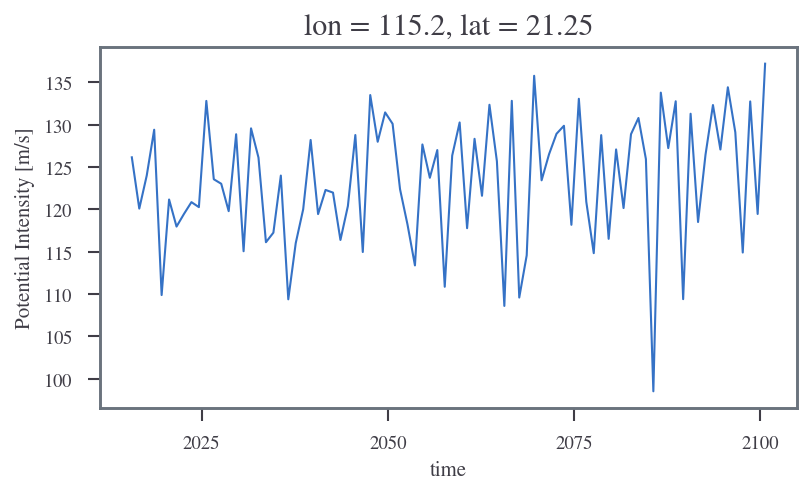

In [14]:
pi_ds.vmax.plot()

In [15]:
new_orleans_ds = get_processed_data_for_point("new_orleans", member="r4i1p1f1", model="CESM2", exp="ssp585")

'convert'  0.00215 s 



In [86]:
new_orleans_ds.to_netcdf("new_orleans_ssp585_r4i1p1f1.nc")

Calculated potential intensity: <xarray.Dataset> Size: 4kB
Dimensions:  (time: 86)
Coordinates:
  * time     (time) object 688B 2015-08-15 12:00:00 ... 2100-08-15 12:00:00
    lon      float64 8B -90.25
    lat      float64 8B 28.75
Data variables:
    vmax     (time) float64 688B 102.4 104.0 102.9 101.5 ... 107.2 108.9 108.6
    pmin     (time) float64 688B 904.0 894.7 901.2 900.6 ... 893.2 883.7 888.1
    ifl      (time) int64 688B 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    t0       (time) float64 688B 204.7 204.6 205.0 204.6 ... 208.3 208.9 207.0
    otl      (time) float64 688B 91.47 90.25 91.01 91.56 ... 75.23 73.79 71.89
Attributes:
    V_reduc:  1.0
    CKCD:     0.9
    ptop:     50.0
'calculate_pi'  0.03220 s 

Calculated potential intensity: <xarray.Dataset> Size: 4kB
Dimensions:  (time: 86)
Coordinates:
  * time     (time) object 688B 2015-08-15 12:00:00 ... 2100-08-15 12:00:00
    lon      float64 8B -90.25
    lat      float64 8B 28.75
Data variables:
    vmax  

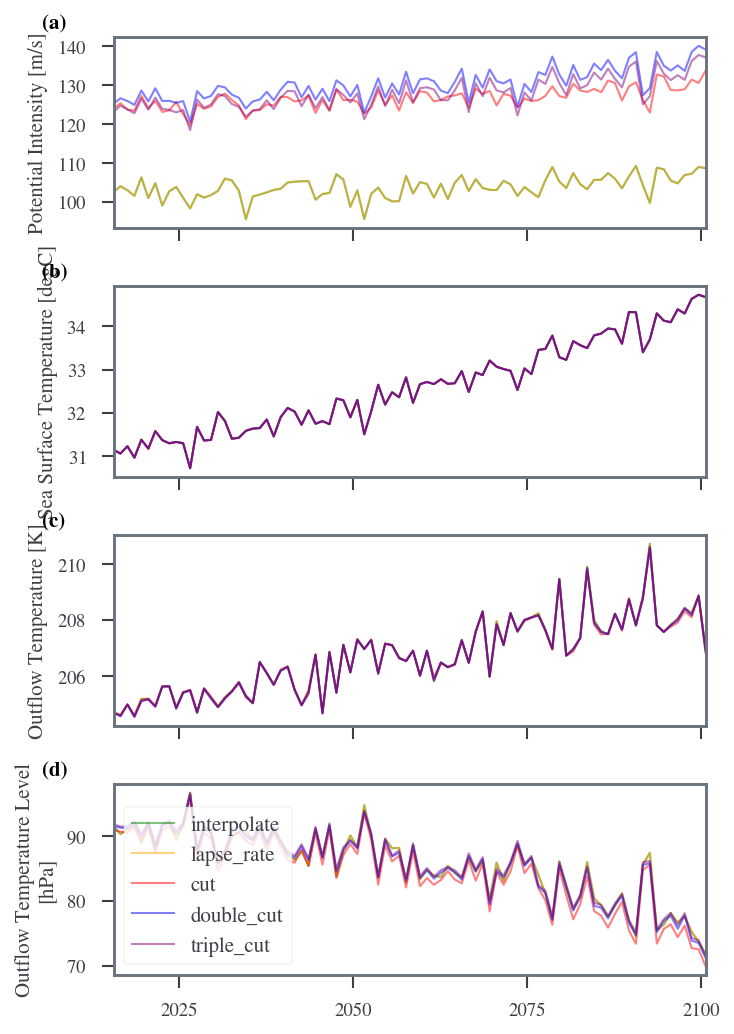

In [85]:
try_all_methods(new_orleans_ds)

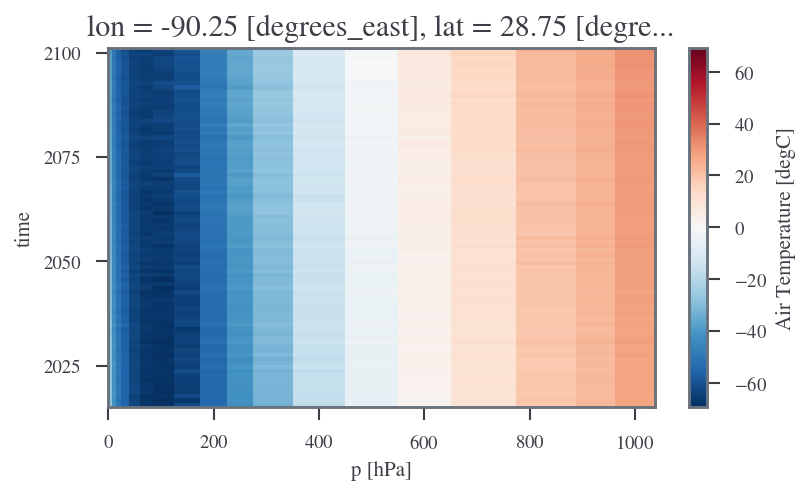

In [16]:
new_orleans_ds.t.plot()

In [17]:
new_orleans_fix = fix_temp_profile(new_orleans_ds)

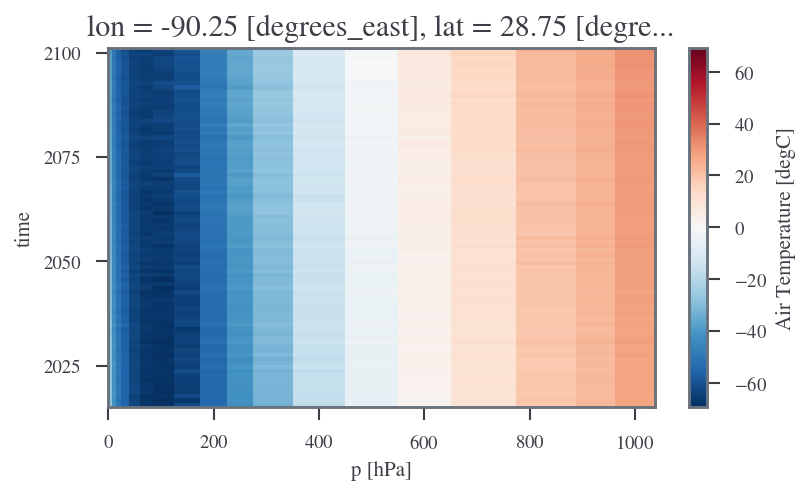

In [18]:
new_orleans_fix.t.plot()

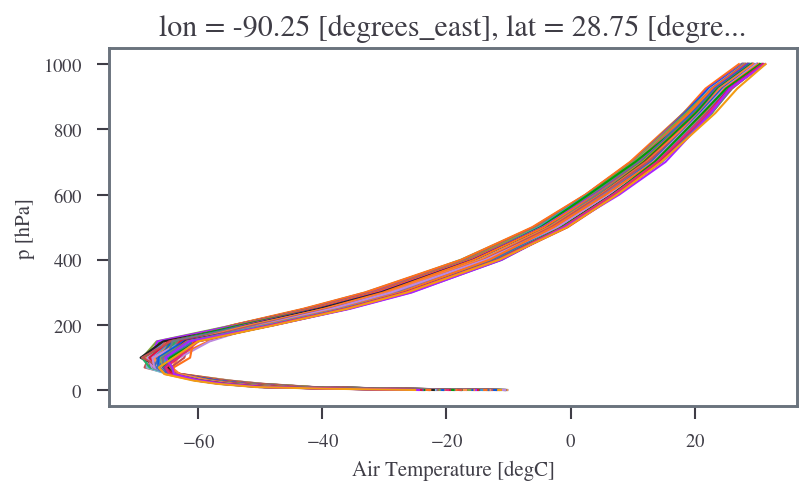

In [19]:
_ = new_orleans_fix.t.plot.line(y="p", label=None, add_legend=False)

In [20]:
new_orleans_pi = calculate_pi(new_orleans_fix)

Calculated potential intensity: <xarray.Dataset> Size: 4kB
Dimensions:  (time: 86)
Coordinates:
  * time     (time) object 688B 2015-08-15 12:00:00 ... 2100-08-15 12:00:00
    lon      float64 8B -90.25
    lat      float64 8B 28.75
Data variables:
    vmax     (time) float64 688B 102.4 104.0 102.9 101.5 ... 107.2 108.9 108.6
    pmin     (time) float64 688B 904.0 894.7 901.2 900.6 ... 893.2 883.7 888.1
    ifl      (time) int64 688B 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    t0       (time) float64 688B 204.7 204.6 205.0 204.6 ... 208.3 208.9 207.0
    otl      (time) float64 688B 91.47 90.25 91.01 91.56 ... 75.23 73.79 71.89
Attributes:
    V_reduc:  1.0
    CKCD:     0.9
    ptop:     50.0
'calculate_pi'  0.58250 s 



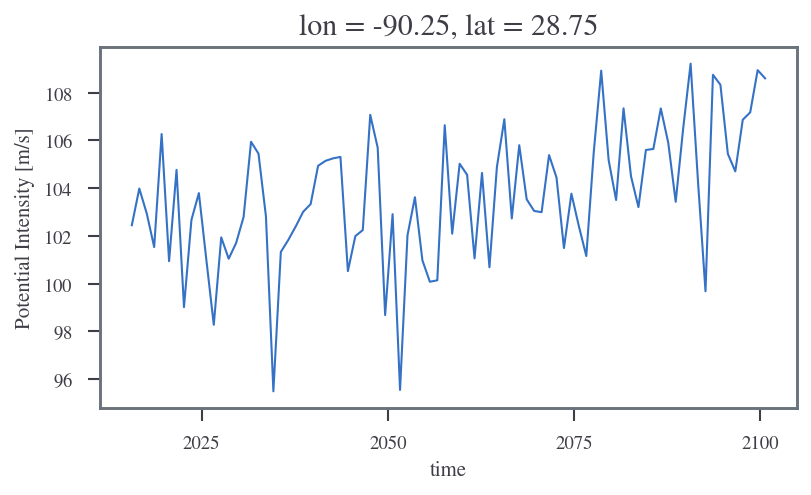

In [21]:
new_orleans_pi.vmax.plot()